In [1]:
import numpy as np
import random
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime
import nltk
import re
import string
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from wordcloud import WordCloud

df = pd.read_csv('samsclean.csv')

In [2]:
df.head()

,Unnamed: 0,date,time,last_election_year,city,state_x,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,candidate,party,candidatevotes,totalvotes,comments_array
0,0,1949-10-10,20:30,1948.0,san marcos,TX,cylinder,2700,45 minutes,this event took place in early fall around it...,4/27/2004,29.883056,-97.941111,NaN,NaN,NaN,NaN,"['this', 'event', 'took', 'place', 'in', 'earl..."
1,1,1956-10-10,21:00,1956.0,edna,TX,circle,20,1/2 hour,my older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,NaN,NaN,NaN,NaN,"['my', 'older', 'brother', 'and', 'twin', 'sis..."
2,2,1957-10-15,20:30,1956.0,houston (ellington afb),TX,light,3,3 seconds,to quot diameter light extremely fast silent ...,9/17/2000,29.763056,-95.363056,NaN,NaN,NaN,NaN,"['to', 'quot', 'diameter', 'light', 'extremely..."
3,3,1957-11-10,19:00,1956.0,corpus christi,TX,light,600,10 minutes,ufo over corpus christi near naval yard on nov...,10/31/2003,27.800278,-97.396111,NaN,NaN,NaN,NaN,"['ufo', 'over', 'corpus', 'christi', 'near', '..."
4,4,1957-01-01,21:00,1956.0,dallas,TX,unknown,20,20 seconds,i was flying the first of usaf aircraft on a ...,8/24/2004,32.783333,-96.800000,NaN,NaN,NaN,NaN,"['i', 'was', 'flying', 'the', 'first', 'of', '..."


In [3]:
def year_pre_post(x):
        if x < 1996:
            return "pre 96"
        else:
            return "post 96"

In [4]:
df["last_election_year"] = df["last_election_year"].apply(lambda x: year_pre_post(x))

In [5]:


    
df.head()
nltk.download('stopwords')
stop_words = stopwords.words("english")

def text_preproc(x):
    if type(x) == str:
        # filtering out stop words
        x = x.encode('ascii', 'ignore').decode()
        x = ' '.join([word for word in x.split(' ') if word not in stop_words and word != "pd"])
        
        return x
    else:
        return ""

df['comments'] = df['comments'].apply(lambda x: text_preproc(x))  
df['comments'] = df['comments'].apply(lambda x: text_preproc(x))
    
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/GurharEffinKhalsa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,date,time,last_election_year,city,state_x,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,candidate,party,candidatevotes,totalvotes,comments_array
0,0,1949-10-10,20:30,pre 96,san marcos,TX,cylinder,2700,45 minutes,event took place early fall around occurred b...,4/27/2004,29.883056,-97.941111,NaN,NaN,NaN,NaN,"['this', 'event', 'took', 'place', 'in', 'earl..."
1,1,1956-10-10,21:00,pre 96,edna,TX,circle,20,1/2 hour,older brother twin sister leaving edna theater...,1/17/2004,28.978333,-96.645833,NaN,NaN,NaN,NaN,"['my', 'older', 'brother', 'and', 'twin', 'sis..."
2,2,1957-10-15,20:30,pre 96,houston (ellington afb),TX,light,3,3 seconds,quot diameter light extremely fast silent mad...,9/17/2000,29.763056,-95.363056,NaN,NaN,NaN,NaN,"['to', 'quot', 'diameter', 'light', 'extremely..."
3,3,1957-11-10,19:00,pre 96,corpus christi,TX,light,600,10 minutes,ufo corpus christi near naval yard november,10/31/2003,27.800278,-97.396111,NaN,NaN,NaN,NaN,"['ufo', 'over', 'corpus', 'christi', 'near', '..."
4,4,1957-01-01,21:00,pre 96,dallas,TX,unknown,20,20 seconds,flying first usaf aircraft simulated bombing ...,8/24/2004,32.783333,-96.800000,NaN,NaN,NaN,NaN,"['i', 'was', 'flying', 'the', 'first', 'of', '..."


In [6]:
# attempting to cluster the text

#https://stackoverflow.com/questions/27889873/clustering-text-documents-using-scikit-learn-kmeans-in-python
vectorizer = TfidfVectorizer(stop_words='english') # suspiciously accurate
#vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df["comments"])
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=1)
model.fit(X)


KMeans(max_iter=1000, n_clusters=2, n_init=1)

In [7]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])


Top terms per cluster:
Cluster 0:
 lights
 object
 sky
 orange
 moving
 bright
 ufo
 shaped
 red
 seen
Cluster 1:
 light
 bright
 sky
 white
 red
 moving
 orange
 ball
 green
 blue


In [8]:
# doesnt seem like the clustering was very informative

In [9]:
#https://www.geeksforgeeks.org/divide-a-pandas-dataframe-randomly-in-a-given-ratio/

training_set = df.sample(frac = 0.8) 

test_set = df.drop(training_set.index) 


from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score, f1_score, classification_report

training_X = vectorizer.transform(training_set["comments"])
test_vect = vectorizer.transform(test_set["comments"]) # vectorizing train and test comments

# clf = MultinomialNB().fit(training_X, training_set["party"])
# predicted = clf.predict(test_vect)
# nb_accuracy = np.mean(predicted == test_set["party"])

clf_year = MultinomialNB().fit(training_X, training_set["last_election_year"])
predicted_year = clf_year.predict(test_vect)
#year_accuracy = np.mean(predicted_year == test_set["last_election_year"])

print(predicted_year)
pre_predictions = 0
for year in predicted_year:
    if year == "pre 96":
        pre_predictions += 1
print(pre_predictions)
# svm_clf = SGDClassifier().fit(training_X, training_set["party"])
# svm_predicted = svm_clf.predict(test_vect)
# svm_accuracy = np.mean(svm_predicted == test_set["party"])

# print("svm:", svm_accuracy)
# print("nb: ", nb_accuracy)


# print("pre 95 vs post 95 classification NB: ", year_accuracy)
print("accuracy", accuracy_score(test_set["last_election_year"], predicted_year))
print("precision", precision_score(test_set["last_election_year"], predicted_year, average='macro')) #weighted takes class imbalance into account
print("recall",recall_score(test_set["last_election_year"], predicted_year, average='macro'))
print("f", f1_score(test_set["last_election_year"], predicted_year, average='macro'))
print("f", classification_report(test_set["last_election_year"], predicted_year))
#average_precision = average_precision_score(test_set["last_election_year"], predicted_year, average='weighted')
#plot_precision_recall_curve(clf_year, test_vect, test_set["last_election_year"])


['post 96' 'post 96' 'post 96' ... 'post 96' 'post 96' 'post 96']
1
accuracy 0.9706138441445363
precision 0.9853037230568256
recall 0.5036764705882353
f 0.4998415305966918
f               precision    recall  f1-score   support

     post 96       0.97      1.00      0.99      4458
      pre 96       1.00      0.01      0.01       136

    accuracy                           0.97      4594
   macro avg       0.99      0.50      0.50      4594
weighted avg       0.97      0.97      0.96      4594



In [10]:
# with svm
# LinearSVC
clf_year_svm = LinearSVC().fit(training_X, training_set["last_election_year"])
predicted_year_svm = clf_year_svm.predict(test_vect)
#year_accuracy_svm = np.mean(predicted_year_svm  == test_set["last_election_year"])

print(predicted_year_svm)
pre_predictions_svm = 0
for year in predicted_year_svm:
    if year == "pre 96":
        pre_predictions_svm += 1
print(pre_predictions_svm)

print("accuracy", accuracy_score(test_set["last_election_year"], predicted_year_svm))
print("precision", precision_score(test_set["last_election_year"], predicted_year_svm, average='macro')) #weighted takes class imbalance into account
print("recall",recall_score(test_set["last_election_year"], predicted_year_svm, average='macro'))
print("f", f1_score(test_set["last_election_year"], predicted_year_svm, average='macro'))
print("f", classification_report(test_set["last_election_year"], predicted_year_svm))
### print("pre 95 vs post 95 classification svm: ", year_accuracy_svm)

['post 96' 'post 96' 'pre 96' ... 'post 96' 'post 96' 'post 96']
18
accuracy 0.9708315193730953
precision 0.7640102952602953
recall 0.5358674425355606
f 0.5575186381030968
f               precision    recall  f1-score   support

     post 96       0.97      1.00      0.99      4458
      pre 96       0.56      0.07      0.13       136

    accuracy                           0.97      4594
   macro avg       0.76      0.54      0.56      4594
weighted avg       0.96      0.97      0.96      4594



In [11]:
# with k-nearest classifierr

clf_year_k = KNeighborsClassifier(n_neighbors=20).fit(training_X, training_set["last_election_year"])
predicted_year_k = clf_year_k.predict(test_vect)
#year_accuracy_k = np.mean(predicted_year_k == test_set["last_election_year"])

print(predicted_year_k)
pre_predictions_k = 0
for year in predicted_year_k:
    if year == "pre 96":
        pre_predictions_k += 1
print(pre_predictions_k)

#print("pre 95 vs post 95 classification K-nearest: ", year_accuracy_k)
print("accuracy", accuracy_score(test_set["last_election_year"], predicted_year_k))
print("precision", precision_score(test_set["last_election_year"], predicted_year_k, average='macro')) #weighted takes class imbalance into account
print("recall",recall_score(test_set["last_election_year"], predicted_year_k, average='macro'))
print("f", f1_score(test_set["last_election_year"], predicted_year_k, average='macro'))
print("f", classification_report(test_set["last_election_year"], predicted_year_k))

['post 96' 'post 96' 'post 96' ... 'post 96' 'post 96' 'post 96']
0
accuracy 0.9703961689159774
precision 0.4851980844579887
recall 0.5
f 0.49248784798939466
f               precision    recall  f1-score   support

     post 96       0.97      1.00      0.98      4458
      pre 96       0.00      0.00      0.00       136

    accuracy                           0.97      4594
   macro avg       0.49      0.50      0.49      4594
weighted avg       0.94      0.97      0.96      4594



In [12]:
# neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 8, 8, 10), max_iter=3000) # more iterations?
mlp.fit(training_X, training_set["last_election_year"])


MLPClassifier(hidden_layer_sizes=(10, 8, 8, 10), max_iter=3000)

In [13]:
predicted_year_mlp = mlp.predict(test_vect)
#year_accuracy_k = np.mean(predicted_year_k == test_set["last_election_year"])

print(predicted_year_mlp)
pre_predictions_mlp = 0
for year in predicted_year_mlp:
    if year == "pre 96":
        pre_predictions_mlp += 1
print(pre_predictions_mlp)

#print("pre 95 vs post 95 classification K-nearest: ", year_accuracy_k)
print("accuracy", accuracy_score(test_set["last_election_year"], predicted_year_mlp))
print("precision", precision_score(test_set["last_election_year"], predicted_year_mlp, average='macro')) #weighted takes class imbalance into account
print("recall",recall_score(test_set["last_election_year"], predicted_year_mlp, average='macro'))
print("f", f1_score(test_set["last_election_year"], predicted_year_mlp, average='macro'))
print(classification_report(test_set["last_election_year"], predicted_year_mlp))

['post 96' 'post 96' 'pre 96' ... 'post 96' 'post 96' 'post 96']
116
accuracy 0.9529821506312581
precision 0.5644106821087
recall 0.5551849945900298
f 0.5593426269343906
              precision    recall  f1-score   support

     post 96       0.97      0.98      0.98      4458
      pre 96       0.16      0.13      0.14       136

    accuracy                           0.95      4594
   macro avg       0.56      0.56      0.56      4594
weighted avg       0.95      0.95      0.95      4594



pre 715
post 22253


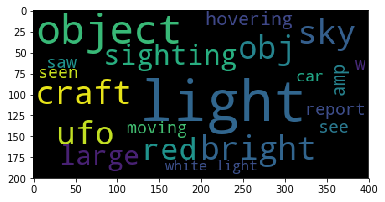

In [14]:
pre_95_comments = ""
post_95_comments = ""
num_pre = 0
num_post = 0

for i, obj in df.iterrows():
    if obj["last_election_year"] == "pre 96":
        pre_95_comments +=  obj["comments"]
        num_pre += 1
    else:
        num_post += 1
        post_95_comments += obj["comments"]
        
##### pre_95_comments = re.sub(r'lights', ' ', pre_95_comments)
pre_95_comments = ' '.join([word for word in pre_95_comments.split(' ')])
post_95_comments = ' '.join([word for word in post_95_comments.split(' ')])

wordcloud_pre = WordCloud(max_words=20).generate(pre_95_comments) 
print("pre", num_pre)
print("post", num_post)

plt.imshow(wordcloud_pre) 

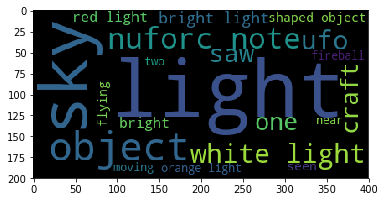

In [15]:
wordcloud_post = WordCloud(max_words=20).generate(post_95_comments) 
plt.imshow(wordcloud_post)

In [16]:
# could pop culture events in late 90s be responsible for the difference?
# could it be due to internet? Easier to report every little supposed anomoly even if just light?

In [17]:
### HYPOTHESES:

# - ~95 begining of internet popularity boom
#       - with internet comes ability to quickly report any little discrepency. Consistent with more reportings 
#         of seeing "light", "object", "sky". Which are not as specific and hardly anomalous events. If harder #
#         to report a sighting, unable to immediately report things you would take more time to think about and 
#         conclude you just saw a light in the sky?
# - Movies or books?
# - Weather events?
# - Changes in aviation patterns?


In [18]:
from apyori import apriori
#https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/



In [19]:
processed = []
for comment in df["comments"]:
    processed.append(comment.split(" "))

sample = random.sample(processed, 300)


for li in sample:
    li = tuple(li)

sample = tuple(sample)
print(len(sample))
#print(sample)


300


In [20]:
association_rules = tuple(apriori(sample, min_support=0.05, min_confidence=0.3, min_lift=3, min_length=2))



In [21]:
for item in list(association_rules):

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")


def print_rules(rules):
    for item in list(rules):

        # first index of the inner list
        # Contains base item and add item
        pair = item[0] 
        items = [x for x in pair]
        print("Rule: " + items[0] + " -> " + items[1])

        #second index of the inner list
        print("Support: " + str(item[1]))

        #third index of the list located at 0th
        #of the third index of the inner list

        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")


In [22]:


pre_comments = []
post_comments = []
for i, obj in df.iterrows():
    if obj["last_election_year"] == "pre 96":
        pre_comments.append(obj["comments"].split(" "))
    else:
        post_comments.append(obj["comments"].split(" "))

pre_sample = random.sample(pre_comments, 700)
post_sample = random.sample(post_comments, 20000)

for li in pre_sample:
    li = tuple(li)

pre_sample = tuple(pre_sample)

for li in post_sample:
    li = tuple(li)

post_sample = tuple(post_sample)

association_rules_pre = tuple(apriori(pre_sample, min_support=0.02, min_confidence=0.3, min_lift=2, min_length=2))
association_rules_post = tuple(apriori(post_sample, min_support=0.02, min_confidence=0.3, min_lift=2, min_length=2))

print("PRE")
print_rules(association_rules_pre)
print("")
print("POST")
print_rules(association_rules_post)

PRE
Rule: light -> bright
Support: 0.05285714285714286
Confidence: 0.45679012345679015
Lift: 2.7097719188114673
Rule: light -> white
Support: 0.04428571428571428
Confidence: 0.5081967213114753
Lift: 3.014726312864684
Rule: red -> lights
Support: 0.03
Confidence: 0.42
Lift: 2.161764705882353
Rule: white -> lights
Support: 0.03571428571428571
Confidence: 0.40983606557377045
Lift: 2.1094503375120537
Rule: man -> obj
Support: 0.02
Confidence: 0.33333333333333337
Lift: 5.426356589147288
Rule: sky -> night
Support: 0.022857142857142857
Confidence: 0.4210526315789474
Lift: 3.349282296650718
Rule: woman -> obj
Support: 0.024285714285714285
Confidence: 0.3953488372093023
Lift: 6.749858196256381
Rule: shaped -> object
Support: 0.024285714285714285
Confidence: 0.3953488372093023
Lift: 2.853032845840326
Rule: woman -> sky
Support: 0.02142857142857143
Confidence: 0.36585365853658536
Lift: 2.9101995565410195
Rule:  -> light
Support: 0.03
Confidence: 0.3962264150943396
Lift: 2.3504956827630314
Rule: 

In [23]:
# predicting red state vs blue state

filtered_df = df[df['party'].notnull()]



In [24]:

# dems = 0
# reps = 0
# third_party = 0
# for i, obj in filtered_df.iterrows():
#     if obj["party"] == "republican":
#         reps += 1
#     elif obj["party"] == "democrat":
#         dems += 1
#     else:
#         obj["party"] == "third party"
#         third_party += 1

# filtering out third party to avoid dealing with class imbalance

for i, obj in df.iterrows():
    if obj["party"] != "republican" and obj["party"] != "democrat":
        obj["party"] = "third party"
    

def count_party(df):
    dems = 0
    reps = 0
    third_party = 0
    for i, obj in df.iterrows():
        if obj["party"] == "republican":
            reps += 1
        elif obj["party"] == "democrat":
            dems += 1
        elif obj["party"] == "third party":
            
            third_party += 1
    print(dems, reps, third_party)

count_party(filtered_df)

15302 7322 0


In [25]:
clean_df = filtered_df[filtered_df["party"] != "third party"]
clean_df = filtered_df[filtered_df["party"] != "democratic-farmer-labor"]
count_party(clean_df)

15302 7322 0


In [26]:
p_train_set = clean_df.sample(frac = 0.8) 

p_test_set = clean_df.drop(p_train_set.index) 

X = vectorizer.transform(p_train_set["comments"])
p_test_vect = vectorizer.transform(p_test_set["comments"]) # vectorizing train and test comments

party_mlp = MLPClassifier(hidden_layer_sizes=(10, 20, 10), max_iter=1000) # more iterations?
party_mlp.fit(X, p_train_set["party"])
predicted_party = party_mlp.predict(p_test_vect)
print(classification_report(p_test_set["party"], predicted_party))

              precision    recall  f1-score   support

    democrat       0.73      0.72      0.72      3069
  republican       0.42      0.42      0.42      1456

    accuracy                           0.63      4525
   macro avg       0.57      0.57      0.57      4525
weighted avg       0.63      0.63      0.63      4525



In [27]:
svm_party_clf = LinearSVC()
svm_party_clf.fit(X, p_train_set["party"])
svm_predicted_party = svm_party_clf.predict(p_test_vect)
print(classification_report(p_test_set["party"], svm_predicted_party))

              precision    recall  f1-score   support

    democrat       0.72      0.88      0.79      3069
  republican       0.54      0.29      0.38      1456

    accuracy                           0.69      4525
   macro avg       0.63      0.59      0.59      4525
weighted avg       0.66      0.69      0.66      4525



In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200, bootstrap=True)
rf_clf.fit(X, p_train_set["party"])
rf_pred_party = rf_clf.predict(p_test_vect)
print(rf_pred_party)
print(classification_report(p_test_set["party"], rf_pred_party))

['republican' 'republican' 'democrat' ... 'democrat' 'democrat' 'democrat']
              precision    recall  f1-score   support

    democrat       0.71      0.96      0.82      3069
  republican       0.67      0.18      0.29      1456

    accuracy                           0.71      4525
   macro avg       0.69      0.57      0.55      4525
weighted avg       0.70      0.71      0.65      4525



In [28]:
reds = ""
blues = ""
for i, obj in clean_df.iterrows():
    if obj["party"] == "republican":
        reds +=  obj["comments"]
    elif obj["party"] == "democrat":
        blues +=  obj["comments"]


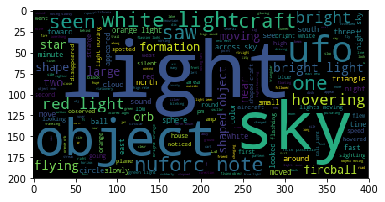

In [162]:
wordcloud_blues = WordCloud().generate(blues)
plt.imshow(wordcloud_blues) 

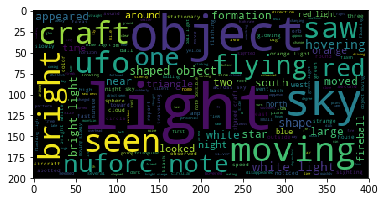

In [159]:
wordcloud_reds = WordCloud().generate(reds)
plt.imshow(wordcloud_reds) 

In [31]:
## association rules/frequent items for red state vs blue state rules would be interesting as well
## blue states report more light in the sky type sightings??